# Визуализация графов в NetworkX

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 1: Введение в сетевой анализ и знакомство с библиотекой NetworkX"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.lattice.grid_2d_graph.html
    * https://networkx.org/documentation/stable/reference/drawing.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.les_miserables_graph.html
    * https://matplotlib.org/stable/users/explain/colors/colormaps.html
    * https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
    

## Вопросы для совместного обсуждения

1\. Рассмотрите основные функции для визуализации графов в NetworkX и их возможности.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

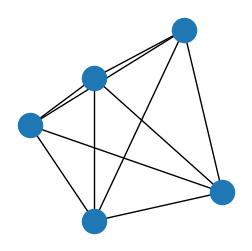

In [2]:
fig, ax = plt.subplots(1,1, figsize = (3,3))
G = nx.complete_graph(5)
pos = {
    0:[0,0],
    1:[0,1.5],
    2:[1,.3],
    3:[-0.5,1],
    4:[.7,2]
}
nx.draw(G, ax= ax, pos = pos )

In [3]:
G.nodes

NodeView((0, 1, 2, 3, 4))

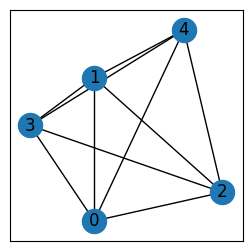

In [4]:
fig, ax = plt.subplots(1,1, figsize = (3,3))
G = nx.complete_graph(5)
pos = {
    0:[0,0],
    1:[0,1.5],
    2:[1,.3],
    3:[-0.5,1],
    4:[.7,2]
}
nx.draw_networkx(G, ax= ax, pos = pos )

In [5]:
pos = nx.spring_layout(G)

In [6]:
pos

{0: array([0.78241659, 0.61985944]),
 1: array([ 0.83734081, -0.55628033]),
 2: array([-1.        , -0.04141419]),
 3: array([-0.27012413, -0.96443692]),
 4: array([-0.34963326,  0.942272  ])}

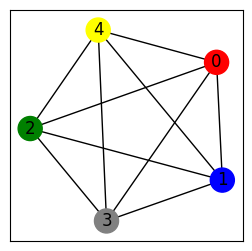

In [7]:
fig, ax = plt.subplots(1,1, figsize = (3,3))
G = nx.complete_graph(5)
# color = 'red'
# color = '#000'
# color = (0,1,0) #rgb
# color = (0,1,0,0.5) #последнее число - прозрачность
color = ['red', 'blue', 'green', 'gray', 'yellow']
nx.draw_networkx(G, ax= ax, pos = pos, node_color = color )

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте двумерную решетку размера 5х3, используя готовую функцию из `networkx`. Создайте словарь `pos`, в котором ключами являются идентификаторы узлов, а значениями - координаты этих узлов на плоскости. Для получения координат узлов считайте, что идентификатор состоит из пар `(x, y)`, где `x` - позиция по _горизонтали_, а `y` - позиция по _вертикали_. Визуализируйте граф, используя полученный словарь. Добавьте на рисунок подписи узлов.

- [X] Проверено на семинаре

In [8]:
grid_g = nx.grid_2d_graph(5, 3)

In [9]:
pos = {(x, y): (x, y) for x, y in grid_g.nodes()}

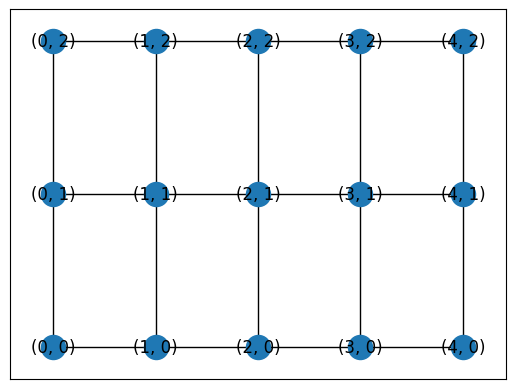

In [10]:
nx.draw_networkx(grid_g, pos)

<p class="task" id="2"></p>

2\. Создайте граф карате-клуба, используя готовую функцию из `networkx`. Используя функции вида `x_layout`, рассчитайте координаты узлов и визуализируйте различные укладки в виде сетки из изображений. Каждому изображению в сетке добавьте заголовок в виде названия используемой функции. Если какая-то функция укладки не применима к данному графу, игнорируйте ее.

- [X] Проверено на семинаре

In [11]:
G = nx.karate_club_graph()

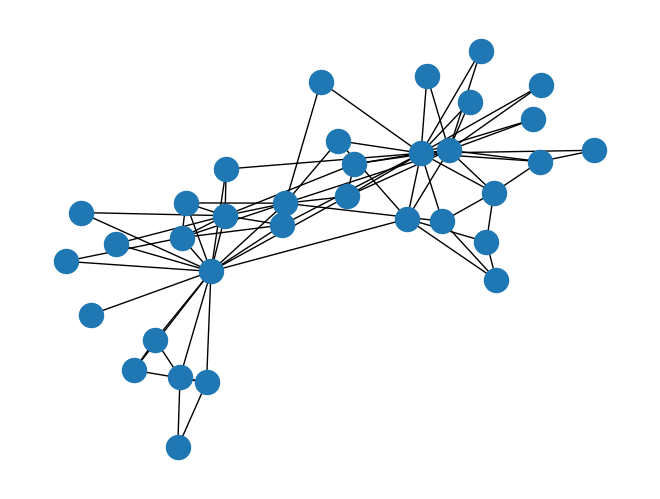

In [12]:
nx.draw(G)

In [13]:
layouts = [
    (nx.circular_layout, 'circular layout'),
    (nx.random_layout, 'random layout'),
    (nx.rescale_layout,'rescale layout'),
    (nx.spectral_layout, 'spectral layout'),
    (nx.spring_layout, 'spring layout'),
    (nx.planar_layout, 'planar layout'),
    (nx.shell_layout, 'shell layout'),
    (nx.spiral_layout, 'spiral layout'),
]


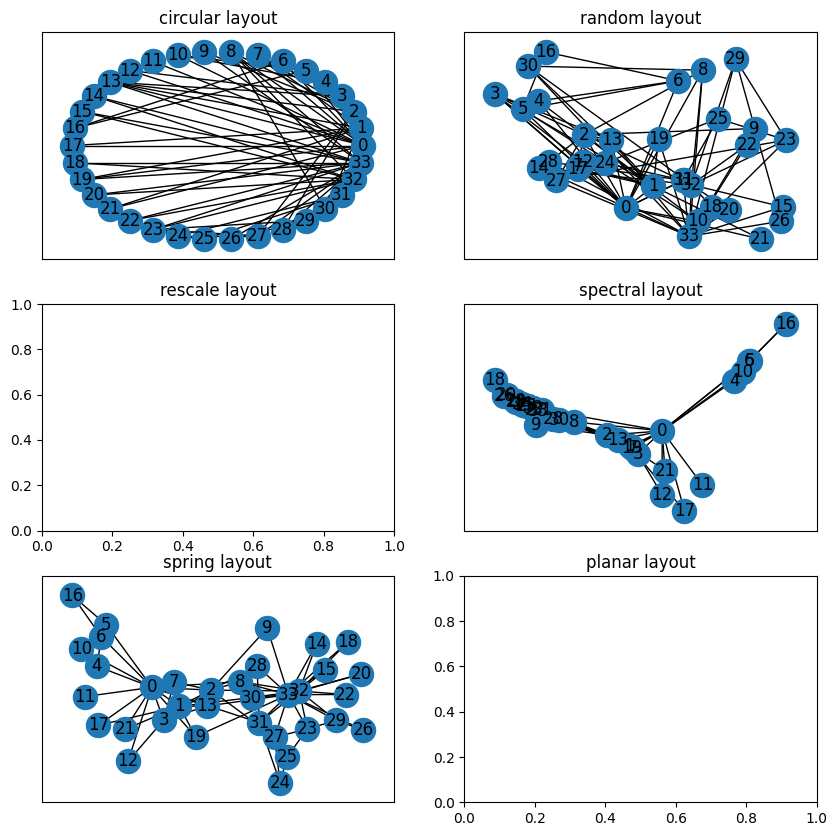

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# print(axes)

for ax, (f, name) in zip(axes.flatten(), layouts):
    try:
        pos = f(G)
        nx.draw_networkx(G, pos=pos, ax=ax)
        ax.set_title(name)
    except:
      ax.set_title(name)


plt.show()

<p class="task" id="3"></p>

3\. Создайте граф карате-клуба, используя готовую функцию из `networkx`. Добавьте узлам атрибут `age`, заполненный целыми числами от 20 до 50. Визуализируйте граф, раскрасив узлы в цвет клуба (красный для "Mr. Hi" и зеленый для "Officer") и сделав размер узла пропорциональным величине атрибута `age`.

- [ ] Проверено на семинаре

In [78]:
G = nx.karate_club_graph()

In [79]:
len(G)

34

In [80]:
import random

In [81]:
for node in G.nodes():
    G.nodes[node]['age'] = random.randint(20, 50)

In [82]:
colors = ['red' if G.nodes[node]['club'] == 'Mr. Hi' else 'green' for node in G.nodes]

In [83]:
sizes = [G.nodes[node]['age']*10 for node in G.nodes()] # домножаю на 10, чтобы наглядно была видна разница в размерах

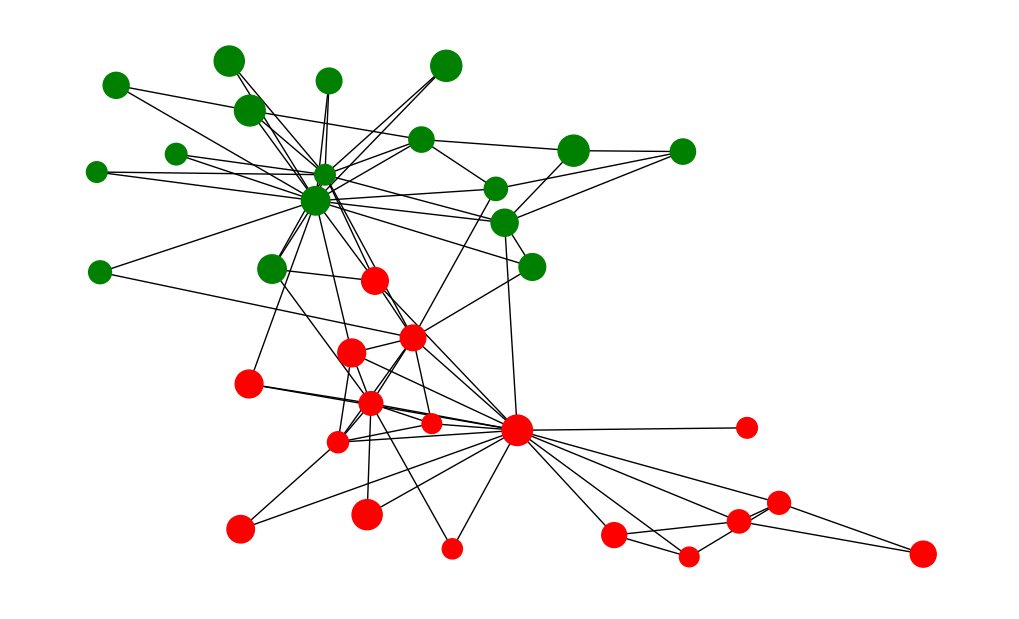

In [84]:
plt.figure(figsize=(10, 6))
nx.draw(G, node_color=colors, node_size=sizes)
plt.show()

<p class="task" id="4"></p>

4\. Создайте ориентированный граф "путь" из 3 узлов. Визуализируйте граф со стрелками увеличенного размера. Визуализируйте граф, развернув стрелки в обратном направлении. На всех визуализациях добавляйте подписи узлов.

- [ ] Проверено на семинаре

In [86]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3)])

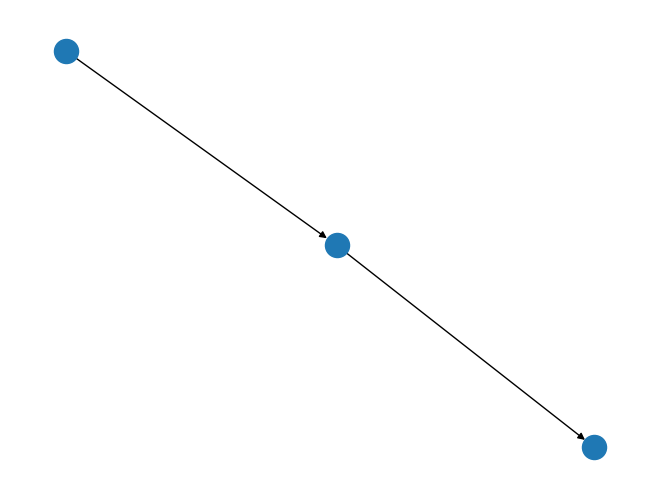

In [87]:
nx.draw(G) # исходный граф

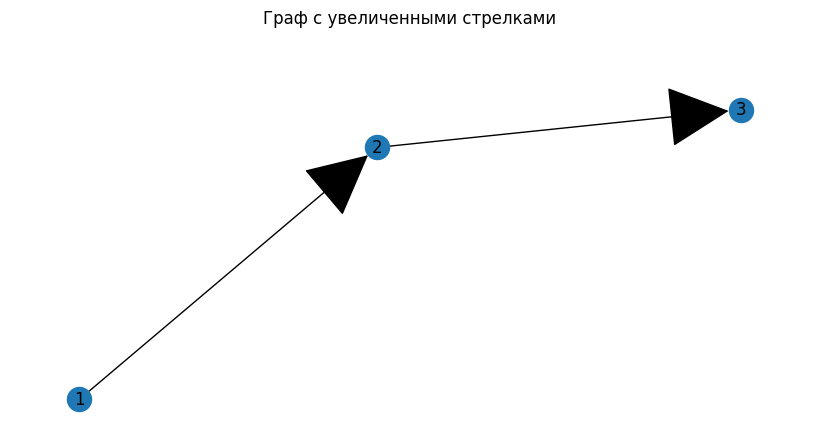

In [88]:
plt.figure(figsize=(8, 4))
nx.draw(G, with_labels=True, arrows=True, arrowsize=100)
plt.title("Граф с увеличенными стрелками")
plt.show()

In [91]:
G.edges

OutEdgeView([(1, 2), (2, 3)])

In [93]:
G.reverse().edges

OutEdgeView([(2, 1), (3, 2)])

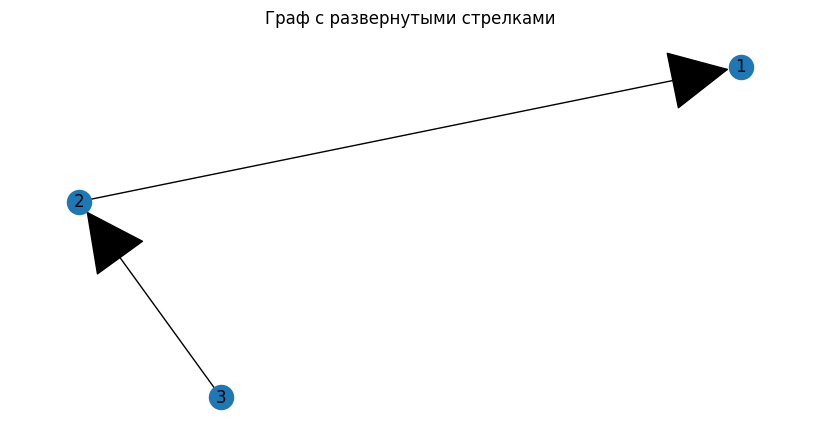

In [89]:
plt.figure(figsize=(8, 4))
nx.draw(G.reverse(), with_labels=True, arrows=True, arrowsize=100)
plt.title("Граф с развернутыми стрелками")
plt.show()

<p class="task" id="5"></p>

5\. Создайте граф `Les Miserables`. Для каждого узла зафиксируйте координату на плоскости при помощи функции `random_layout`. Отрисуйте узлы графа при помощи функции `draw_networkx_nodes` с указанием размера узлов 10. Получите список `edge_colors` значений атрибута `weight` на ребрах и ограничьте (clip) его сверху значением 10, снизу значением 1. Отрисуйте ребра графа при помощи функции `draw_networkx_edges`, раскрасив ребра в цвет, соответствующий значениям `edge_colors` с применением цветовой карты `viridis`. Добавьте на визуализацию colorbar, показывающий градиент цветов ребер.

- [ ] Проверено на семинаре

In [94]:
G = nx.les_miserables_graph()

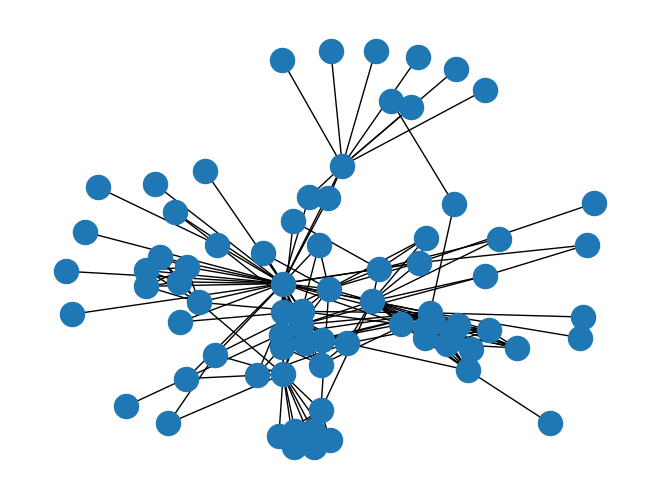

In [95]:
nx.draw(G)

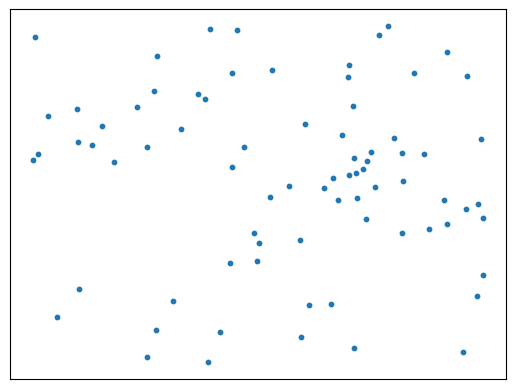

In [96]:
pos = nx.random_layout(G)

nx.draw_networkx_nodes(G, pos=pos, node_size=10)
plt.show()

In [97]:
edge_colors = [min(max(G[u][v]['weight'], 1), 10) for u, v in G.edges()]

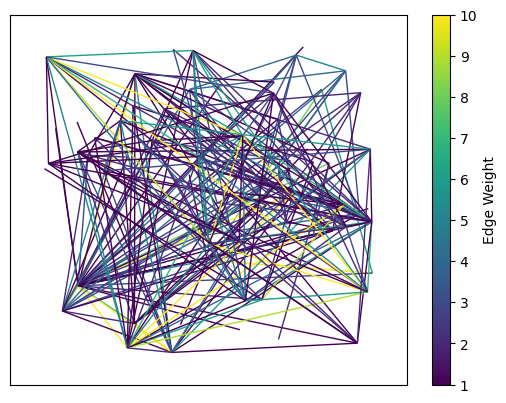

In [98]:
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis)
cbar = plt.colorbar(edges)
plt.show()


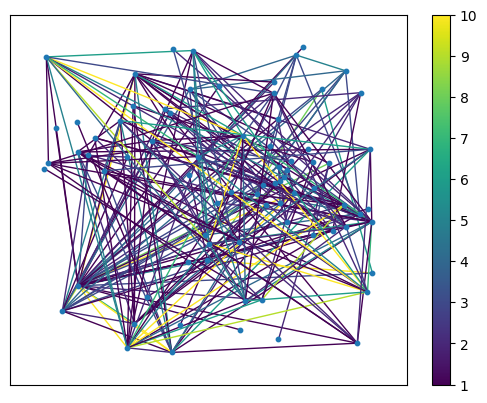

In [99]:
# все вместе
nx.draw_networkx_nodes(G, pos=pos, node_size=10)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis)
cbar = plt.colorbar(edges)
plt.show()